In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import xarray as xr
import time #useful for timing functions
import sys
import glob #glob is helpful for searching for filenames or directories
import scipy #scientific python
import pickle #for saving data
import skimage
from skimage import io
from importlib import reload

import ddm_analysis as da
import ddm_fit as df
import test_ddm as ddm
import mpfit_parameters_dictionaries as mpd

I want to open two analysis files and average together the DDM matrices (or radial averages). 

In [2]:
data_path = "Y:\\Ryan McGorty\\2021-11-12_SilicaRods60x\\images_2\\"
data_file_1 = "ddm_matrix_images_2_gradientsquaredX.nc"
data_file_2 = "ddm_matrix_images_2_gradientsquaredY.nc"

data1 = xr.open_dataset(data_path+data_file_1)
data2 = xr.open_dataset(data_path+data_file_2)

In [3]:
data1

<xarray.Dataset>
Dimensions:         (time: 200, q_y: 256, q_x: 256, q: 128)
Coordinates:
  * time            (time) float64 0.01241 0.02481 0.03722 ... 58.41 60.2 62.03
    framelag        (time) int32 ...
  * q_y             (q_y) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q_x             (q_x) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q               (q) float64 0.0 0.1136 0.2273 0.3409 ... 14.2 14.32 14.43
Data variables:
    ddm_matrix      (time, q_y, q_x) float64 ...
    ravs            (time, q) float64 ...
    av_fft_offrame  (q) float64 ...
    B               float64 ...
    B_std           float64 ...
    Amplitude       (q) float64 ...
    ISF             (time, q) float64 ...
Attributes: (12/18)
    units:                   Intensity
    time:                    sec or frame number
    q:                       μm$^-$$^1$
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/svc-scst255lab/Documents/Ryan/2021-11-1...
    FileName:                images_2_gradientsquaredX.tif
    ...                      ...
    last_lag_time:           5000
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2

In [53]:
combo = data1.copy()

In [54]:
combo['ravs'] = 0.5*(data1.ravs + data2.ravs)

In [61]:
combo['Amplitude'] = 0.5*(data1.Amplitude + data2.Amplitude)

In [63]:
combo['B'] = 0.5*(data1.B + data2.B)

In [64]:
combo['ISF'] = 0.5*(data1.ISF + data2.ISF)

<IPython.core.display.Javascript object>


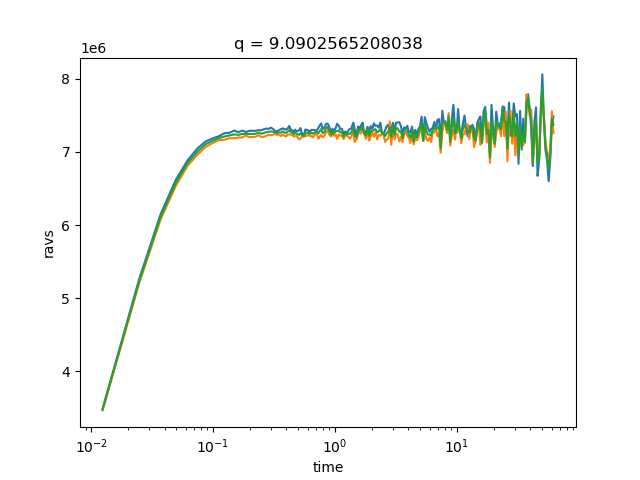

[]

In [56]:
qval = 80
data1.ravs.isel(q=qval).plot()
data2.ravs.isel(q=qval).plot()
combo.ravs.isel(q=qval).plot()
plt.semilogx()

In [57]:
combo.attrs['FileName'] = "%s and %s" % (data1.FileName, data2.FileName)

In [58]:
combo

<xarray.Dataset>
Dimensions:         (time: 200, q_y: 256, q_x: 256, q: 128)
Coordinates:
  * time            (time) float64 0.01241 0.02481 0.03722 ... 58.41 60.2 62.03
    framelag        (time) int32 1 2 3 4 5 6 7 ... 4303 4434 4569 4708 4852 5000
  * q_y             (q_y) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q_x             (q_x) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q               (q) float64 0.0 0.1136 0.2273 0.3409 ... 14.2 14.32 14.43
Data variables:
    ddm_matrix      (time, q_y, q_x) float64 ...
    ravs            (time, q) float64 6.164e+06 6.148e+06 ... 7.544e+06
    av_fft_offrame  (q) float64 4.379e+10 6.57e+07 ... 3.845e+06 3.707e+06
    B               float64 7.681e+06
    B_std           float64 9.631e+04
    Amplitude       (q) float64 8.758e+10 1.237e+08 ... 8.594e+03 -2.662e+05
    ISF             (time, q) float64 1.0 1.013 1.013 ... 3.681 -27.64 0.3207
Attributes: (12/18)
    units:                   Intensity
    time:                    sec or frame number
    q:                       μm$^-$$^1$
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/svc-scst255lab/Documents/Ryan/2021-11-1...
    FileName:                images_2_gradientsquaredX.tif and images_2_gradi...
    ...                      ...
    last_lag_time:           5000
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2

In [65]:
combo.to_netcdf(data_path + "ddm_matrix_images_2_gradientsquaredXY.nc")

In [66]:
combo.close()